In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def exp_func(lmbd, p):
    return -1 / max(lmbd, -0.000001) * np.log(p)

def generate_request_time_exp(lmbd, work_time):
    T_server = [0]
    while True:
        new_t = T_server[-1] + exp_func(lmbd, np.random.rand())
        if new_t > work_time:
            break
        T_server.append(new_t)
    T_server.pop(0)
    return np.asarray(T_server)

def generate_process_time_exp(lmbd, n):
    return exp_func(lmbd, np.random.rand(n))

def get_f_o_t(cur_t, last_start_s1, last_end_s1, last_start_s2, last_end_s2):
    last_t = max(last_start_s1, last_start_s2)
    two = max(0, (min(last_end_s1, last_end_s2) - last_t))
    free = max(0, cur_t - max(last_end_s1, last_end_s2))
    one = cur_t - last_t - two - free
    return (free, one, two)

def simulate(Ts, Tz, work_time):
    last_time = 0
    processed_signals = 0
    processing_time = 0
    free_time = 0
    for i in range(len(Ts)):
        if last_time <= Ts[i]:
            free_time += Ts[i] - last_time
            last_time = Ts[i] + Tz[i]
            processing_time += Tz[i]
            processed_signals += 1
    free_time += max(0, work_time - last_time)
    return processed_signals, free_time, processing_time

In [42]:
lmbd = 0.5
mu = 0.6
Tmod = 17

In [87]:
T_req = generate_request_time_exp(lmbd, Tmod)
T_processing = generate_process_time_exp(mu, len(T_req))

processed_requests, T_p, T_f = simulate(T_req, T_processing, 17)
print("============Симуляция============")
# print(f"T_req: {T_req}")
# print(f"T_prc: {T_processing}")
print(f"Число обработанных программ: {processed_requests}")
print(f"Число отказов: {len(T_req) - processed_requests}")
print(f"Общее число программ поступивших за заданное вреся моделирования: {len(T_req)}")
print(f"Относительная пропускная способность ВС: {processed_requests / len(T_req)}")
print(f"Время работы процессора: {T_p}")
print(f"Время простоя процессора: {T_f}")
print(f"Общее время моделирования: {T_f + T_p}")
print(f"Загрузка процессора: {T_p / (T_f + T_p)}")
print(f"Вероятность простоя процессора: {T_f / (T_f + T_p)}")

============Симуляция============
Число обработанных программ: 6
Число отказов: 4
Общее число программ поступивших за заданное вреся моделирования: 10
Относительная пропускная способность ВС: 0.6
Время работы процессора: 7.675457182328982
Время простоя процессора: 9.324542817671018
Общее время моделирования: 17.0
Загрузка процессора: 0.4514974813134695
Вероятность простоя процессора: 0.5485025186865304


In [89]:
p = lmbd / mu
p0 = 1 / (1 + p)
pf = p * p0
Q = (1 - pf)
A = Q * lmbd
k = A / mu

print("============Теория============")
print(f"Вероятность простоя: {p0}")
print(f"Вероятность отказа: {pf}")
print(f"Относительная пропускная способность: {Q}")
print(f"Абсолютная пропускная способность: {A}")
print(f"Коэфф. загрузки каналов: {k}")



============Теория============
Вероятность простоя: 0.5454545454545454
Вероятность отказа: 0.45454545454545453
Относительная пропускная способность: 0.5454545454545454
Абсолютная пропускная способность: 0.2727272727272727
Коэфф. загрузки каналов: 0.45454545454545453


In [35]:
ros = np.linspace(0.1, 1, 1000)
mu2 = 5
Tmod2 = 100

Z1 = []
Z2 = []
for ro in ros:
    lmbd2 = ro * mu2
    T_req = generate_request_time_exp(lmbd2, Tmod2)
    T_processing = generate_process_time_exp(mu2, len(T_req))

    processed_requests, T_p, T_f = simulate(T_req, T_processing, Tmod2)
    Z1.append(processed_requests / len(T_req))
    Z2.append(1 - (processed_requests / len(T_req)))

Pabr = 1 / (1 + ros)
Ps = 1 - Pabr


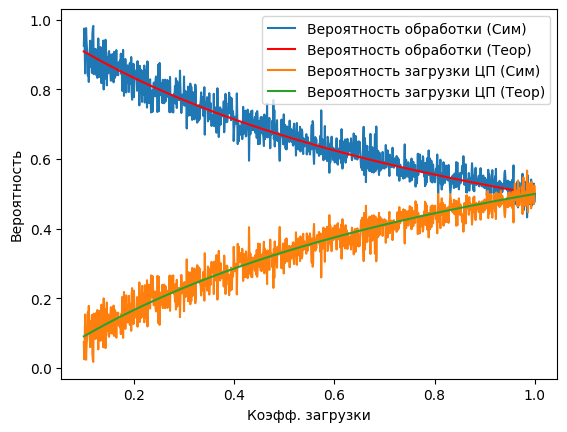

In [45]:
plt.plot(ros, Z1, label='Вероятность обработки (Сим)')
plt.plot(ros, Pabr, color='red', label='Вероятность обработки (Теор)')
plt.plot(ros, Z2, label='Вероятность загрузки ЦП (Сим)')
plt.plot(ros, Ps, label='Вероятность загрузки ЦП (Теор)')
plt.xlabel("Коэфф. загрузки")
plt.ylabel("Вероятность")
plt.legend()
plt.show()